## IMPORTACIÓN DE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
Fuga=pd.read_csv('TRAIN_FUGA.csv',encoding="ISO-8859-1",sep=',')
Fuga.head()

,Unnamed: 0,CODMES,TARGET_MODEL2,EDAD,SEXO,DEPARTAMENTO,INGRESO_BRUTO_M1,FLG_CLIENTE,SEGMENTO,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,PROM_CTD_TRX_6M,ANT_CLIENTE,REC_AGENTE_TD,CTD_RECLAMOS_M1
0,1,201411,0,46,F,PIURA,NaN,NO CLIENTE,2,0,0,0.0,0.0,0,0,0,0.0,224.0,NaN,0
1,2,201411,0,54,M,LORETO,4718.0,CLIENTE,1BC,0,0,0.0,1.0,0,0,0,0.0,123.0,NaN,0
2,3,201411,0,81,M,NaN,NaN,CLIENTE,6,0,0,NaN,NaN,0,0,0,0.0,264.0,NaN,0
3,4,201411,0,42,M,PIURA,936.0,CLIENTE,2,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0
4,5,201411,0,52,M,MOQUEGUA,5844.0,CLIENTE,1BC,0,0,NaN,NaN,0,0,0,0.0,263.0,NaN,0


In [3]:
Fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787495 entries, 0 to 787494
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          787495 non-null  int64  
 1   CODMES              787495 non-null  int64  
 2   TARGET_MODEL2       787495 non-null  int64  
 3   EDAD                787495 non-null  int64  
 4   SEXO                787495 non-null  object 
 5   DEPARTAMENTO        760520 non-null  object 
 6   INGRESO_BRUTO_M1    600241 non-null  float64
 7   FLG_CLIENTE         787495 non-null  object 
 8   SEGMENTO            787495 non-null  object 
 9   FLG_ADEL_SUELDO_M1  787495 non-null  int64  
 10  FREC_AGENTE         787495 non-null  int64  
 11  FLG_VEH_SF          518112 non-null  float64
 12  FLG_CONV_SF         518112 non-null  float64
 13  FREC_KIOSKO         787495 non-null  int64  
 14  FREC_BPI_TD         787495 non-null  int64  
 15  FREC_MON_TD         787495 non-nul

## - ANALISIS DESCRIPTIVO

**OBSERVAMOS EL TOTAL DE NULOS EN CADA VARIABLES**

In [4]:
 Fuga.isnull().sum()

Unnamed: 0                 0
CODMES                     0
TARGET_MODEL2              0
EDAD                       0
SEXO                       0
DEPARTAMENTO           26975
INGRESO_BRUTO_M1      187254
FLG_CLIENTE                0
SEGMENTO                   0
FLG_ADEL_SUELDO_M1         0
FREC_AGENTE                0
FLG_VEH_SF            269383
FLG_CONV_SF           269383
FREC_KIOSKO                0
FREC_BPI_TD                0
FREC_MON_TD                0
PROM_CTD_TRX_6M            0
ANT_CLIENTE              923
REC_AGENTE_TD         695206
CTD_RECLAMOS_M1            0
dtype: int64

**OBSERVAMOS GRAFICAMENTE**

<AxesSubplot:>

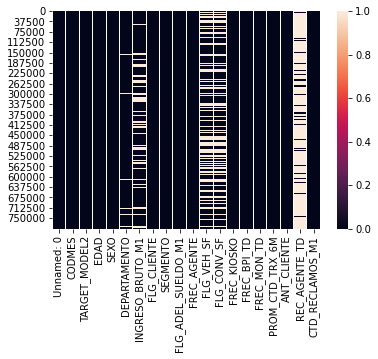

In [5]:
sns.heatmap(Fuga.isnull())

**GRAFICAMOS EL TARGET**

C:\Users\FIORE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


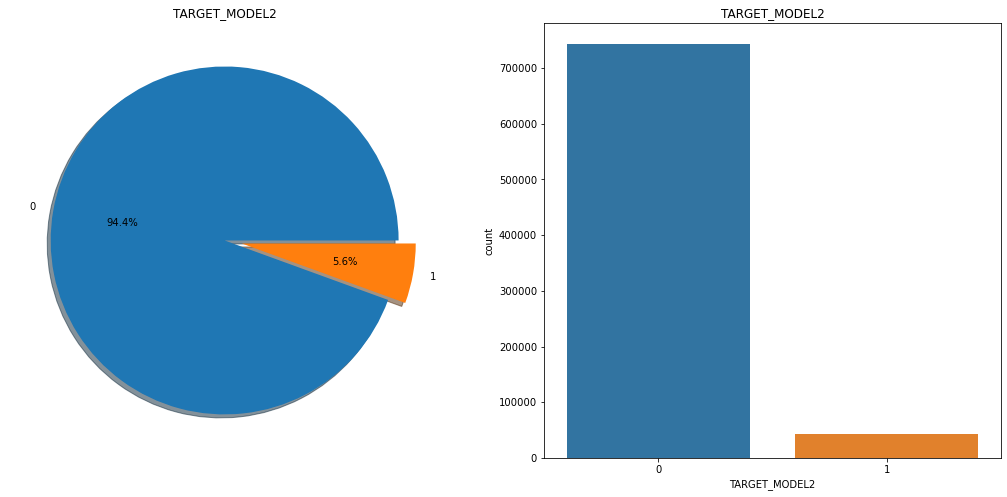

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))
Fuga['TARGET_MODEL2'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TARGET_MODEL2')
ax[0].set_ylabel('')
sns.countplot('TARGET_MODEL2',data=Fuga,ax=ax[1])
ax[1].set_title('TARGET_MODEL2')
plt.show()

**OBSERVAMOS EN PORCENTAJES EL TARGET**

In [7]:
count_no_sub=len(Fuga[Fuga['TARGET_MODEL2']==0])
count_sub=len(Fuga[Fuga['TARGET_MODEL2']==1])
pct_of_no_sub=count_no_sub/(count_no_sub + count_sub)
print("porcentaje de no fuga",pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub + count_sub)
print("porcentaje de fuga",pct_of_sub*100)

porcentaje de no fuga 94.44491711058483
porcentaje de fuga 5.5550828894151705


**GRAFICAMOS EL TARGET RESPECTO AL SEXO**

<AxesSubplot:xlabel='SEXO', ylabel='count'>

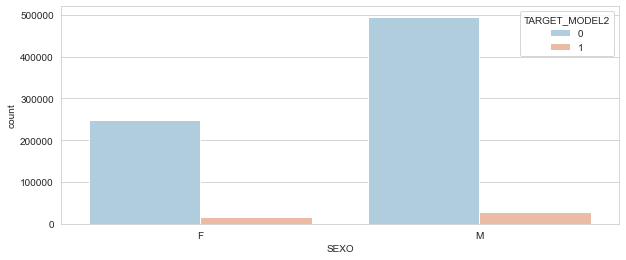

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,4))
sns.countplot(x='SEXO',hue='TARGET_MODEL2',data=Fuga,palette='RdBu_r')

<AxesSubplot:xlabel='FREC_BPI_TD', ylabel='count'>

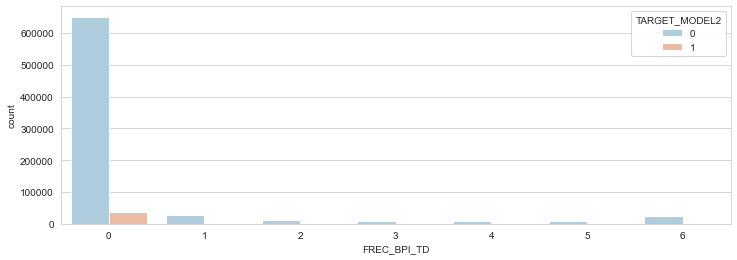

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(x='FREC_BPI_TD',hue='TARGET_MODEL2',data=Fuga,palette='RdBu_r')

<AxesSubplot:xlabel='FLG_ADEL_SUELDO_M1', ylabel='count'>

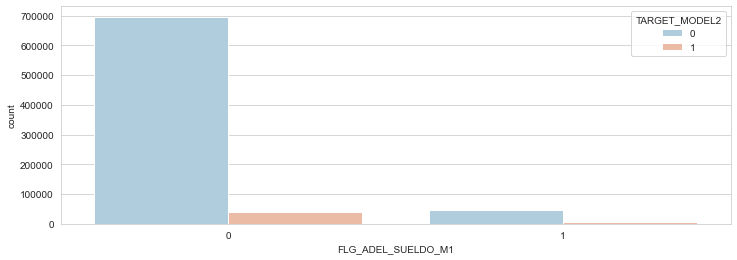

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(x='FLG_ADEL_SUELDO_M1',hue='TARGET_MODEL2',data=Fuga,palette='RdBu_r')

**COMPORTAMIENTO DE LA EDAD**

C:\Users\FIORE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EDAD'>

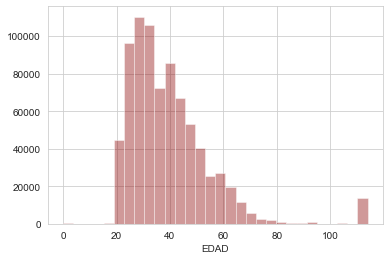

In [11]:
 sns.distplot(Fuga['EDAD'].dropna(),kde=False,color='darkred',bins=30)

## TRATAMIENTO DE DATOS

**IMPUTACIONES**

- **Inicialmente tenemos:**

<AxesSubplot:>

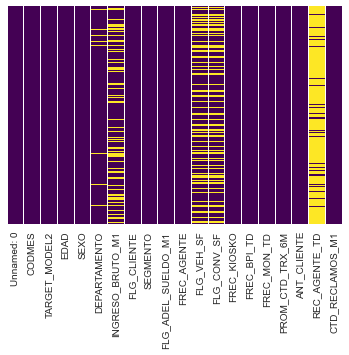

In [12]:
sns.heatmap(Fuga.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
Fuga['DEPARTAMENTO'] = Fuga['DEPARTAMENTO'].fillna(Fuga['DEPARTAMENTO'].mode()[0])
Fuga['INGRESO_BRUTO_M1'] = Fuga['INGRESO_BRUTO_M1'].fillna(Fuga['INGRESO_BRUTO_M1'].mean())
Fuga['FLG_VEH_SF'] = Fuga['FLG_VEH_SF'].fillna(Fuga['FLG_VEH_SF'].mode()[0])
Fuga['FLG_CONV_SF'] = Fuga['FLG_CONV_SF'].fillna(Fuga['FLG_CONV_SF'].mode()[0])
Fuga['ANT_CLIENTE'] = Fuga['ANT_CLIENTE'].fillna(Fuga['ANT_CLIENTE'].mean())

<AxesSubplot:>

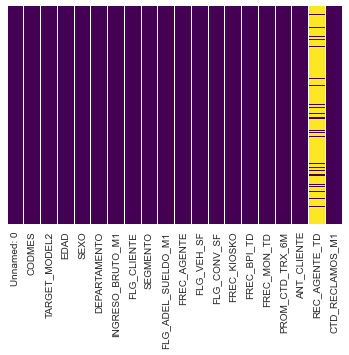

In [14]:
sns.heatmap(Fuga.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**ELIMINAMOS VARIABLES QUE NO APORTAN AL MODELO**

In [15]:
Fuga.drop(['Unnamed: 0','CODMES','REC_AGENTE_TD'],axis=1,inplace=True)

In [16]:
Fuga.drop(['SEGMENTO','PROM_CTD_TRX_6M','DEPARTAMENTO'],axis=1,inplace=True)

In [17]:
Fugaexcel= Fuga.to_excel("df_excel.xlsx")

- **Podemos observar que nuestra data ya no tiene datos nulos**

<AxesSubplot:>

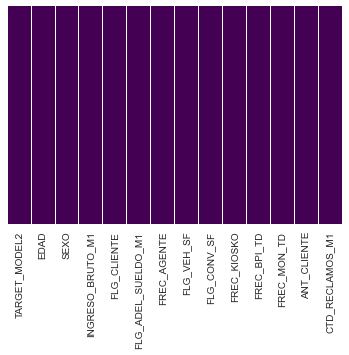

In [18]:
sns.heatmap(Fuga.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## GENERAMOS DUMMIES

In [19]:
Fuga = pd.get_dummies(Fuga, columns=['SEXO','FLG_CLIENTE']) 


In [20]:
Fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787495 entries, 0 to 787494
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TARGET_MODEL2           787495 non-null  int64  
 1   EDAD                    787495 non-null  int64  
 2   INGRESO_BRUTO_M1        787495 non-null  float64
 3   FLG_ADEL_SUELDO_M1      787495 non-null  int64  
 4   FREC_AGENTE             787495 non-null  int64  
 5   FLG_VEH_SF              787495 non-null  float64
 6   FLG_CONV_SF             787495 non-null  float64
 7   FREC_KIOSKO             787495 non-null  int64  
 8   FREC_BPI_TD             787495 non-null  int64  
 9   FREC_MON_TD             787495 non-null  int64  
 10  ANT_CLIENTE             787495 non-null  float64
 11  CTD_RECLAMOS_M1         787495 non-null  int64  
 12  SEXO_F                  787495 non-null  uint8  
 13  SEXO_M                  787495 non-null  uint8  
 14  FLG_CLIENTE_CLIENTE 

**COMPONENTES PRINCIPALES**

**IMPORTAMOS**

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


In [22]:
import statsmodels.api as sm

- PROCESAMOS EL MODELO

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

- VARIABLES NUMERICAS

In [24]:
numerico=['EDAD','INGRESO_BRUTO_M1','ANT_CLIENTE']

In [25]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
Fuga[numerico].mean(axis=0)

----------------------
Media de cada variable
----------------------


EDAD                  39.250776
INGRESO_BRUTO_M1    2565.256405
ANT_CLIENTE          105.254629
dtype: float64

In [26]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
Fuga[numerico].var(axis=0)


-------------------------
Varianza de cada variable
-------------------------


EDAD                2.481565e+02
INGRESO_BRUTO_M1    8.370534e+06
ANT_CLIENTE         2.516696e+04
dtype: float64

- MODELO PCA

In [27]:
pca_pipe = make_pipeline(StandardScaler(), PCA())


In [28]:
pca_pipe.fit(Fuga[numerico])

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

- Se extrae el modelo entrenado del pipeline

In [29]:
modelo_pca = pca_pipe.named_steps['pca']

- Se combierte el array a dataframe para añadir nombres a los ejes.

In [30]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = Fuga[numerico].columns,
    index   = ['PC1', 'PC2', 'PC3']
)

,EDAD,INGRESO_BRUTO_M1,ANT_CLIENTE
PC1,0.660908,0.396780,0.636998
PC2,-0.201757,0.911494,-0.358430
PC3,-0.722838,0.108370,0.682467


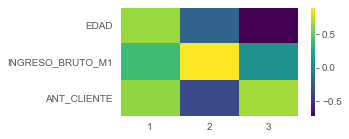

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(Fuga[numerico].columns)), Fuga[numerico].columns)
plt.xticks(range(len(Fuga[numerico].columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

- Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.44911278 0.31273953 0.23814769]


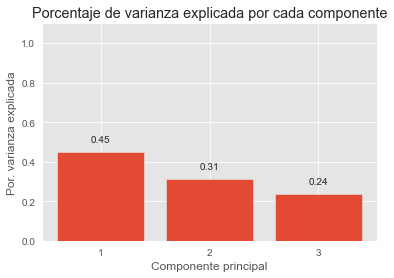

In [32]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(Fuga[numerico].columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');


- En este caso, la primera componente explica el 45% de la varianza observada en los datos y la segunda el 31%.

- Porcentaje de varianza explicada acumulada

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.44911278 0.76185231 1.        ]


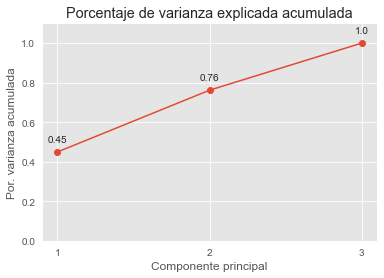

In [33]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(Fuga[numerico].columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(Fuga[numerico].columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

- Proyección de las observaciones de entrenamiento

In [34]:
proyecciones = pca_pipe.transform(X=Fuga[numerico])
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3'],
    index   = Fuga[numerico].index
)
proyecciones.head()

,PC1,PC2,PC3
0,0.759964,-0.354732,0.201144
1,0.985283,0.449224,-0.519805
2,2.388984,-0.893373,-1.232781
3,0.525304,-0.904913,0.491437
4,1.617946,0.513270,0.216418


In [35]:
proyecciones.shape

(787495, 3)

In [36]:
fuga = pd.concat([Fuga, proyecciones], axis = 1)


In [37]:
fuga.drop(['PC3','EDAD','INGRESO_BRUTO_M1','ANT_CLIENTE'],axis=1,inplace=True)

In [38]:
fuga.head()

,TARGET_MODEL2,FLG_ADEL_SUELDO_M1,FREC_AGENTE,FLG_VEH_SF,FLG_CONV_SF,FREC_KIOSKO,FREC_BPI_TD,FREC_MON_TD,CTD_RECLAMOS_M1,SEXO_F,SEXO_M,FLG_CLIENTE_CLIENTE,FLG_CLIENTE_NO CLIENTE,PC1,PC2
0,0,0,0,0.0,0.0,0,0,0,0,1,0,0,1,0.759964,-0.354732
1,0,0,0,0.0,1.0,0,0,0,0,0,1,1,0,0.985283,0.449224
2,0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,2.388984,-0.893373
3,0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,0.525304,-0.904913
4,0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,1.617946,0.513270


## BALANCEO DE DATOS

- **INSTALAMOS**

In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
y=fuga['TARGET_MODEL2']
X=fuga.drop(['TARGET_MODEL2'],axis=1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101,stratify=y)

- Contamos:

In [44]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 520624, 1: 30622})


- Balanceo:

In [45]:
os = SMOTE(random_state = 0)

In [46]:
os_data_X, os_data_y = os.fit_resample(X_train.values, y_train.values)

In [47]:
counter = Counter(os_data_y)
print(counter)

Counter({0: 520624, 1: 520624})


- Modelos de Machine Learning

In [48]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


## Métricas de los modelos
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


In [49]:
get_ipython().system('pip install lightgbm')

In [50]:

from lightgbm import LGBMClassifier

In [51]:
model_lgbm = LGBMClassifier()

- Entreno el modelo con el .fit

In [52]:
model_lgbm.fit(os_data_X,os_data_y.ravel())

LGBMClassifier()

- Ordenando las mejores variables de mayor a menor generando un bucle en este caso un for para extraer los nombres de las columnas y la ganancia(Gain) de las variables mas impactantes

In [53]:
features = []
for feature in zip(X.columns, model_lgbm.feature_importances_):
    features.append(feature)

- Genero un dataframe para visualizar mejor lo que hizo random forest con su selector multivariado

In [54]:
features_total = pd.DataFrame(features,columns=['Variables','Gain']).sort_values('Gain', ascending=False)
features_total

,Variables,Gain
13,PC2,498
12,PC1,488
1,FREC_AGENTE,402
6,FREC_MON_TD,374
5,FREC_BPI_TD,355
4,FREC_KIOSKO,326
8,SEXO_F,127
0,FLG_ADEL_SUELDO_M1,126
3,FLG_CONV_SF,101
10,FLG_CLIENTE_CLIENTE,96


In [55]:
from sklearn.feature_selection import SelectFromModel

- Uso SelectFromModel poniendo lo parametros del modelo que se contruyo y un␣threshold que es un punto de corte quepuede asumir de acuerdo a tu criterio con respecto a las variables que estén␣generando mas Gain

In [56]:
sfm = SelectFromModel(model_lgbm, threshold=100)

In [57]:
sfm.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(), threshold=100)

- contruyo una lista para quedarme con las mejores variables

In [58]:
variables = []
for feature_list_index in sfm.get_support(indices=True):
    variables.append(X.columns[feature_list_index])

In [59]:
variables

['FREC_AGENTE',
 'FREC_KIOSKO',
 'FREC_BPI_TD',
 'FREC_MON_TD',
 'SEXO_F',
 'FLG_CLIENTE_CLIENTE',
 'PC1',
 'PC2']

In [60]:
best_X_train = X_train[variables]
best_X_test = X_test[variables]

In [61]:
 from time import time
# construimos un lightgbm, ojo que para elY es el mismo porque es un vector univariado
best_model = LGBMClassifier()
best_model.fit(best_X_train, y_train)
# predecimos el train y test con la probabilidad para validar luego
predict_train_lg = best_model.predict_proba(best_X_train)[:,1]
predict_test_lg = best_model.predict_proba(best_X_test)[:,1]
# imprimimos el roc de train y test con la data real y la prediccion de la probabilidad del modelo
print("auc o Roc on training in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_train, predict_train_lg)))
print("auc o Roc on testing in LGBMClassifier data : {:.3f}".format(roc_auc_score(y_test, predict_test_lg)))


auc o Roc on training in LGBMClassifier data : 0.731
auc o Roc on testing in LGBMClassifier data : 0.710


In [74]:
predict_train_lg[0:5]

array([0.00526942, 0.10390554, 0.03406695, 0.13159886, 0.09900705])

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [63]:
 from pprint import pprint
# Mostramos todos los parametros que tiene ligthGBMlo usamos porque es mas rápido para tunear el modelo
print('Parameters currently in use:\n')
pprint(best_model.get_params())


Parameters currently in use:

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}


In [64]:
 # Numero de arboles
iterations = [300, 400, 500]
# porcentaje de variables con la que se contruye un arbol
colsample_bytree = [0.7, 0.8, 0.9]
# profundidad del arbol
max_depth = [4, 6, 8]
# ratio de aprendizaje por cada arbol
learning_rate = [0.1, 0.15 ,0.2]
# creacion del grip search o grilla generando un diccionario
param_grid = {'iterations': iterations,
'colsample_bytree': colsample_bytree,
'max_depth': max_depth,
'learning_rate': learning_rate}
pprint(param_grid)

{'colsample_bytree': [0.7, 0.8, 0.9],
 'iterations': [300, 400, 500],
 'learning_rate': [0.1, 0.15, 0.2],
 'max_depth': [4, 6, 8]}


In [65]:
lgb = LGBMClassifier()
# Isntacia del grip search ponemos la grilla , la cantidad de kfolds para la␣validacion cruzada en este caso 5
# n_jobs -1 para la paralelizacion de la ejecucion en la optimizacion del␣ modelo y verbose para mostrar de 2 en 2 los resultados
grid_search = GridSearchCV(estimator = lgb, param_grid = param_grid, cv = 5,
n_jobs = -1, verbose = 2)
# FIT para ejecutarlo
X_best = X[variables] ## recordar que se usa toda la data completa y con las␣ mejores variables
grid_search.fit(X_best, y)
grid_search.best_params_ # mostramos los mejores hiperparametros

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Unknown parameter: iterations


{'colsample_bytree': 0.7,
 'iterations': 300,
 'learning_rate': 0.1,
 'max_depth': 4}

In [66]:
def evaluate(model, test_features,test_labels):
    predictions= model.predict_proba(test_features)[:,1] 
    roc = roc_auc_score(test_labels,predictions) 
    print('Model Performance')
    print('roc_auc_score = {:.12g}%.'.format(roc))
    return roc

In [67]:
base_model = LGBMClassifier()
base_model.fit(best_X_train, y_train)
base_roc = evaluate(base_model, best_X_test, y_test)
## pasamos la funcion evaluate para sacar el resultado del modelo
best_grid = grid_search.best_estimator_
grid_roc = evaluate(best_grid, best_X_test, y_test)
print('Mejora en {:.12g}%.'.format( 100 * (grid_roc - base_roc) / base_roc))

Model Performance
roc_auc_score = 0.709904512271%.
Model Performance
roc_auc_score = 0.711017550159%.
Mejora en 0.156786985979%.


In [68]:
 base_roc


0.7099045122712297

In [69]:
 base_roc



0.7099045122712297

In [70]:
grid_roc

0.7110175501593505

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

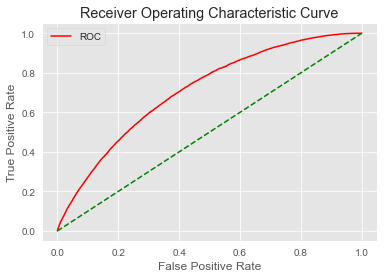

In [72]:

fper, tper, thresholds = roc_curve(y_test, predict_test_lg)
plot_roc_curve(fper, tper)